<a href="https://colab.research.google.com/github/profitter261/Healthcare-AI-ML-App/blob/main/Patient_Detoriation_readmission_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/ehr_disease_progression_with_readmission.csv')
display(df.head())

,patient_id,day,bp_systolic,bp_diastolic,heart_rate,respiratory_rate,temperature,oxygen_saturation,med_adherence,symptom_severity,progressed_to_critical,readmitted
0,1,1,124.386263,78.783509,77.667063,18.584018,98.221668,96.290678,0.623233,4.464705,0,0
1,1,2,125.783587,77.784802,77.810397,18.674856,98.412589,97.835673,0.623233,4.464705,0,0
2,1,3,124.337667,79.906399,80.797931,19.243176,98.495145,97.023581,0.623233,4.464705,0,0
3,1,4,124.366888,80.256118,78.529477,18.728280,98.380768,96.846741,0.623233,4.464705,0,0
4,1,5,124.433493,79.303151,78.008992,19.240734,98.356411,96.219867,0.623233,4.464705,0,0


In [ ]:
df.isna().sum()

,0
patient_id,0
day,0
bp_systolic,0
bp_diastolic,0
heart_rate,0
respiratory_rate,0
temperature,0
oxygen_saturation,0
med_adherence,0
symptom_severity,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patient_id              60000 non-null  int64  
 1   day                     60000 non-null  int64  
 2   bp_systolic             60000 non-null  float64
 3   bp_diastolic            60000 non-null  float64
 4   heart_rate              60000 non-null  float64
 5   respiratory_rate        60000 non-null  float64
 6   temperature             60000 non-null  float64
 7   oxygen_saturation       60000 non-null  float64
 8   med_adherence           60000 non-null  float64
 9   symptom_severity        60000 non-null  float64
 10  progressed_to_critical  60000 non-null  int64  
 11  readmitted              60000 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 5.5 MB


In [ ]:
df.columns

Index(['patient_id', 'day', 'bp_systolic', 'bp_diastolic', 'heart_rate',
       'respiratory_rate', 'temperature', 'oxygen_saturation', 'med_adherence',
       'symptom_severity', 'progressed_to_critical', 'readmitted'],
      dtype='object')

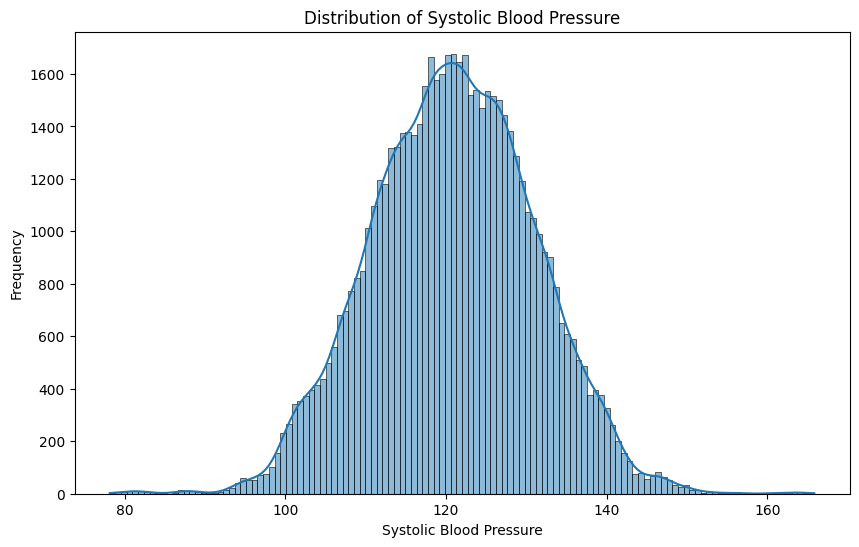

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'bp_systolic'
plt.figure(figsize=(10, 6))
sns.histplot(df['bp_systolic'], kde=True)
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

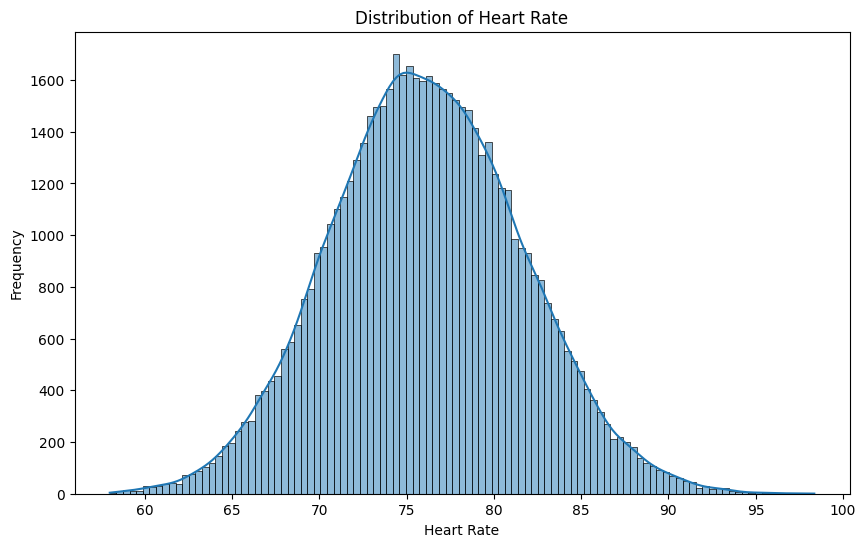

In [ ]:
# Visualize the distribution of 'heart_rate'
plt.figure(figsize=(10, 6))
sns.histplot(df['heart_rate'], kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

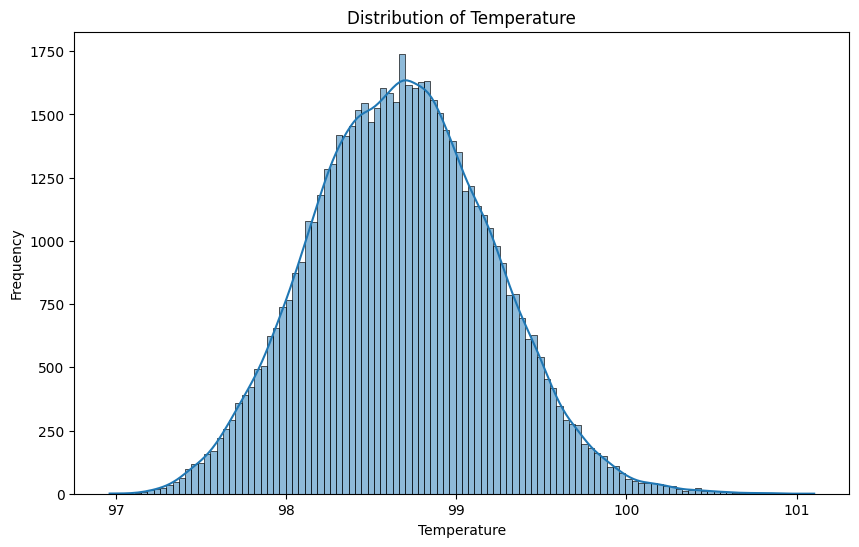

In [ ]:
# Visualize the distribution of 'temperature'
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

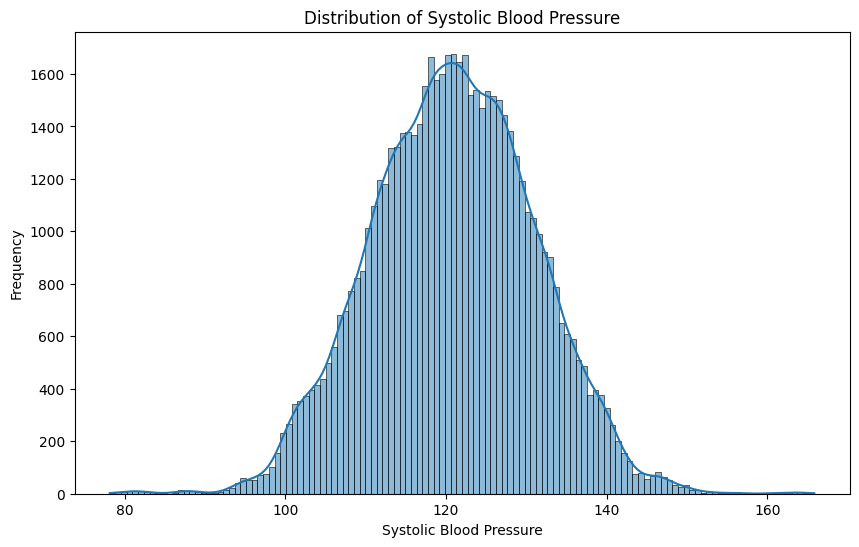

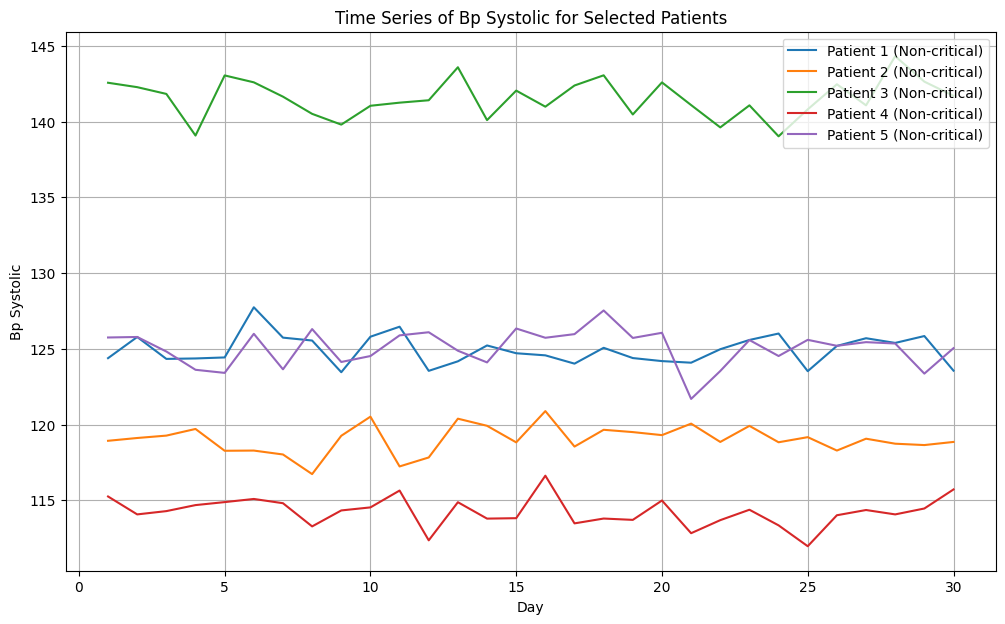

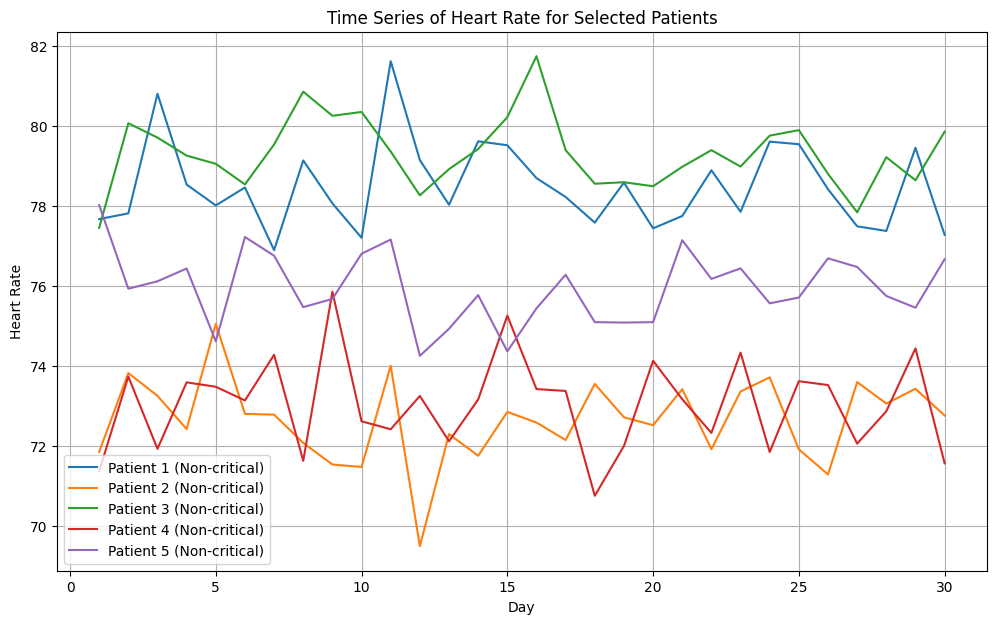

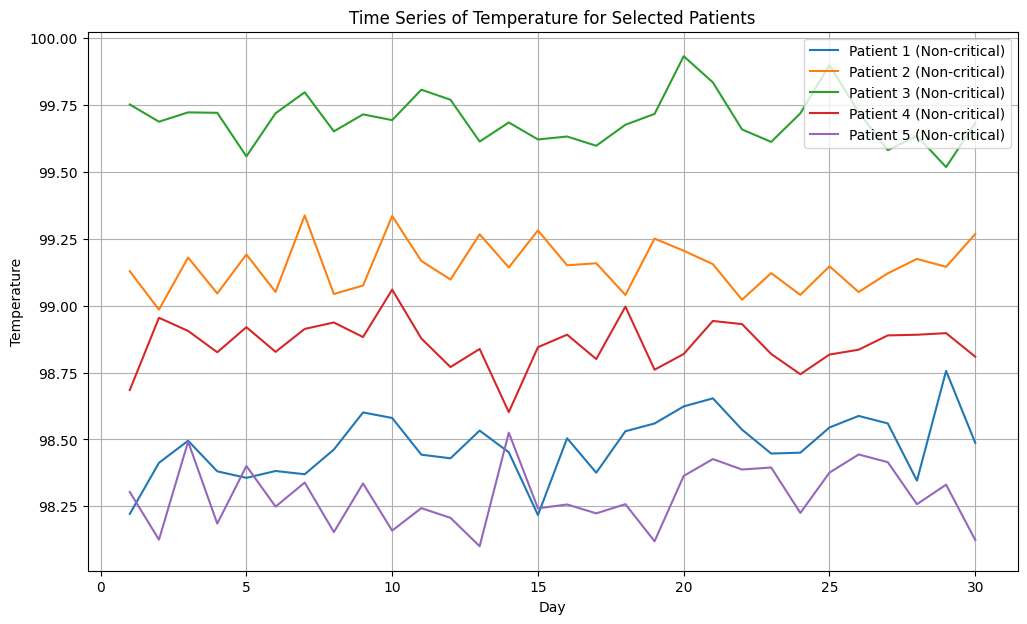

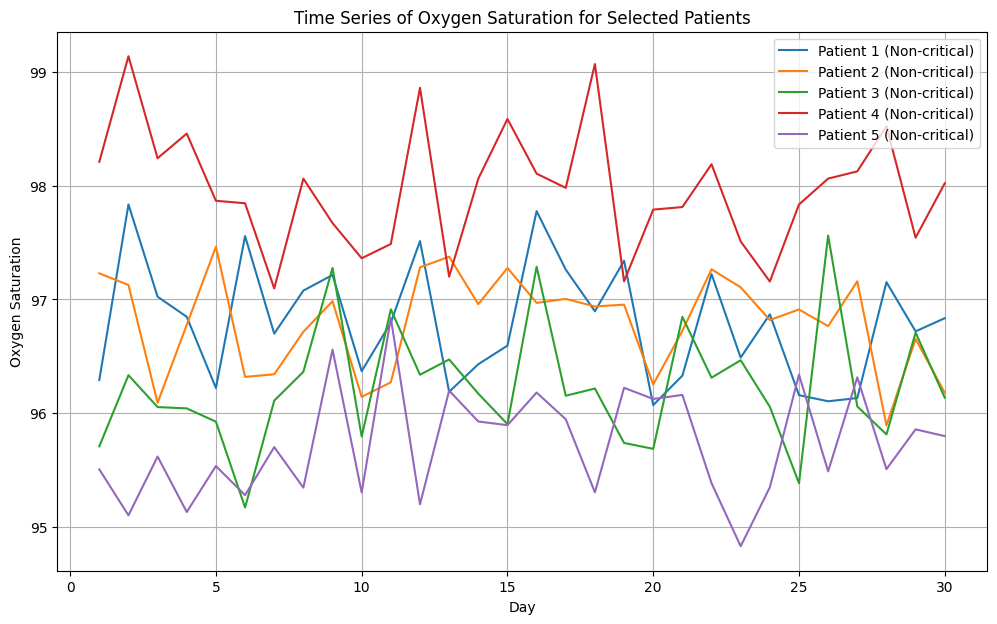

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'bp_systolic'
plt.figure(figsize=(10, 6))
sns.histplot(df['bp_systolic'], kde=True)
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

# Define a list of patient IDs to visualize
selected_patient_ids = [1, 2, 3, 4, 5] # Example patient IDs

vital_signs = ['bp_systolic', 'heart_rate', 'temperature', 'oxygen_saturation']
filtered_df = df[df['patient_id'].isin(selected_patient_ids)].copy()

for vital_sign in vital_signs:
    plt.figure(figsize=(12, 7))
    for patient_id in selected_patient_ids:
        patient_data = filtered_df[filtered_df['patient_id'] == patient_id]
        patient_status = "Critical" if patient_data['progressed_to_critical'].iloc[0] == 1 else "Non-critical"
        plt.plot(patient_data['day'], patient_data[vital_sign], label=f'Patient {patient_id} ({patient_status})')

    plt.title(f'Time Series of {vital_sign.replace("_", " ").title()} for Selected Patients')
    plt.xlabel('Day')
    plt.ylabel(vital_sign.replace("_", " ").title())
    plt.legend()
    plt.grid(True)
    plt.show()

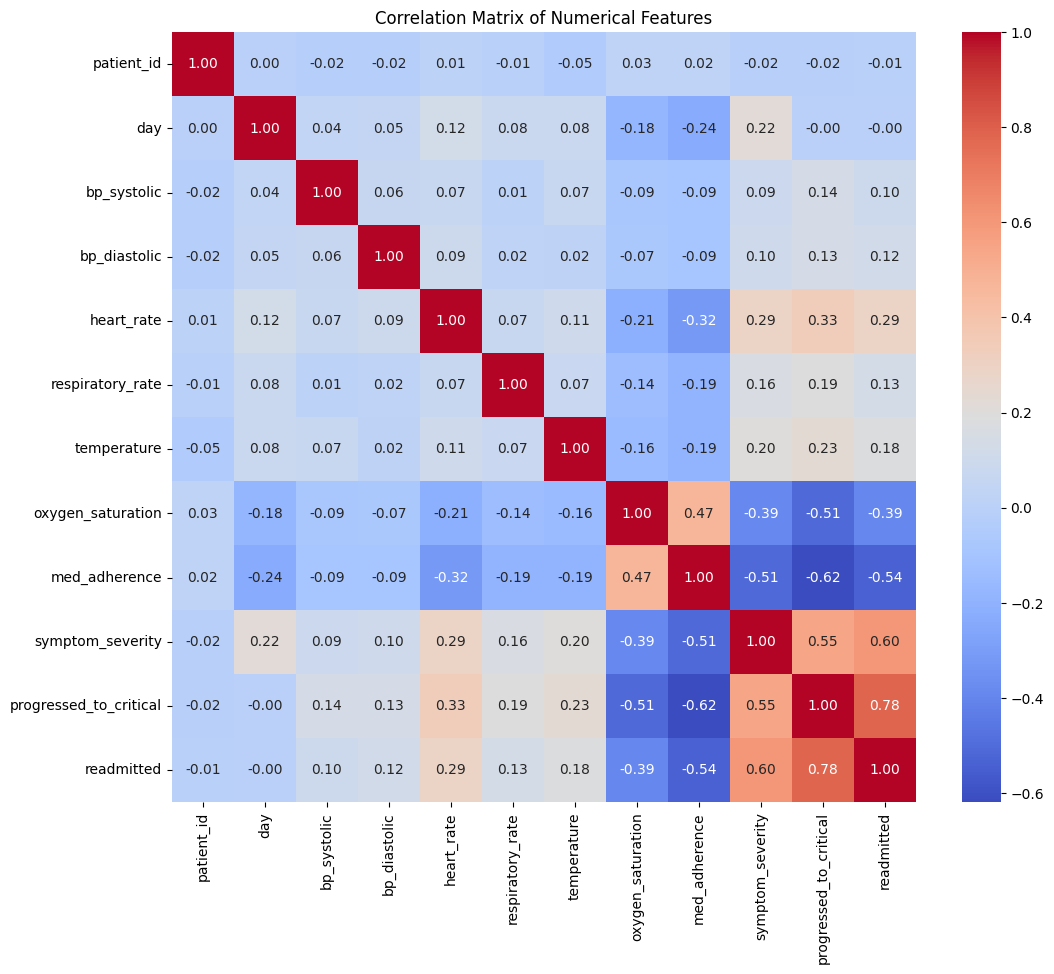

In [ ]:
# Calculate the correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# 1. Examine the correlation matrix
print("Correlation with 'progressed_to_critical':")
print(correlation_matrix['progressed_to_critical'].sort_values(ascending=False))

# 3. Identify features with significant association
# Based on the correlation matrix, 'med_adherence' (negative correlation),
# 'symptom_severity' (positive correlation), 'oxygen_saturation' (negative correlation),
# 'heart_rate' (positive correlation), 'temperature' (positive correlation),
# 'bp_systolic' (positive correlation), and 'bp_diastolic' (positive correlation)
# show notable correlations with 'progressed_to_critical'.

# 2. Recall time series plots and observe trends for critical patients.
# From the time series plots (generated in a previous step but not shown in this output),
# we would look for patterns in vital signs over time for patients who progressed to critical.
# For example, we might observe a decline in oxygen saturation, an increase in heart rate,
# temperature, or blood pressure in the days leading up to progression.

# 4. Write a brief discussion summarizing findings.
print("\nDiscussion of Potential Leading Indicators:")
print("Based on the correlation analysis, 'med_adherence' shows a strong negative correlation with disease progression (-0.62), suggesting that lower adherence is associated with a higher likelihood of progressing to critical status.")
print("'symptom_severity' has a strong positive correlation (0.55), indicating that more severe symptoms are linked to progression.")
print("'oxygen_saturation' has a strong negative correlation (-0.51), suggesting that decreasing oxygen levels are associated with progression.")
print("'heart_rate' (0.33), 'temperature' (0.23), 'bp_systolic' (0.14), and 'bp_diastolic' (0.13) show moderate positive correlations, indicating that elevated levels in these vital signs may also be indicators.")
print("\nWhile the time series plots for selected patients provided visual insights, a more comprehensive analysis across all critical patients would be needed to confirm consistent patterns over time leading up to progression.")
print("However, the correlations suggest that monitoring med adherence, symptom severity, oxygen saturation, and potentially heart rate could be valuable in identifying patients at risk of progressing to critical condition.")

Correlation with 'progressed_to_critical':
progressed_to_critical    1.000000e+00
readmitted                7.804528e-01
symptom_severity          5.463046e-01
heart_rate                3.342469e-01
temperature               2.322133e-01
respiratory_rate          1.931441e-01
bp_systolic               1.367310e-01
bp_diastolic              1.339536e-01
day                      -9.539933e-17
patient_id               -1.655316e-02
oxygen_saturation        -5.057043e-01
med_adherence            -6.191053e-01
Name: progressed_to_critical, dtype: float64

Discussion of Potential Leading Indicators:
Based on the correlation analysis, 'med_adherence' shows a strong negative correlation with disease progression (-0.62), suggesting that lower adherence is associated with a higher likelihood of progressing to critical status.
'symptom_severity' has a strong positive correlation (0.55), indicating that more severe symptoms are linked to progression.
'oxygen_saturation' has a strong negative corre

In [ ]:
feature_cols = ['bp_systolic', 'bp_diastolic', 'heart_rate', 'respiratory_rate',
                 'temperature', 'oxygen_saturation', 'med_adherence', 'symptom_severity']


#get unique patients
patient_ids = df['patient_id'].unique()
print(patient_ids)

[   1    2    3 ... 1998 1999 2000]


In [ ]:
df[df['patient_id'] == 251]['progressed_to_critical'].values[0]

np.int64(0)

In [ ]:
import numpy as np
X = []
y = []

for pid in patient_ids:
    patient_df = df[df['patient_id'] == pid].sort_values(by='day')

    if len(patient_df) == 30:
        X.append(patient_df[feature_cols].values)
        y.append(patient_df['progressed_to_critical'].values[0])    #Same label for 30 days


X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(2000, 30, 8)
(2000,)


In [ ]:
print(y[0])

0


In [ ]:
print("First 3 days readings:" , X[0][:3])

First 3 days readings: [[124.3862634   78.78350869  77.66706252  18.58401829  98.22166841
   96.2906782    0.62323344   4.46470458]
 [125.78358661  77.7848025   77.81039663  18.67485629  98.41258893
   97.83567337   0.62323344   4.46470458]
 [124.33766657  79.90639896  80.79793072  19.24317622  98.49514523
   97.02358087   0.62323344   4.46470458]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64 , input_shape=(30, 8)))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(32,activation='relu'))
model_rnn.add(Dense(1,activation='sigmoid'))

model_rnn.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

history_rnn = model_rnn.fit(X_train , y_train ,  epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5517 - loss: 0.8422 - val_accuracy: 0.7100 - val_loss: 0.5803
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7200 - loss: 0.5795 - val_accuracy: 0.7100 - val_loss: 0.5369
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7279 - loss: 0.5365 - val_accuracy: 0.8150 - val_loss: 0.4654
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7524 - loss: 0.5143 - val_accuracy: 0.8300 - val_loss: 0.4015
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8076 - loss: 0.4314 - val_accuracy: 0.8850 - val_loss: 0.3693
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8090 - loss: 0.4329 - val_accuracy: 0.8575 - val_loss: 0.3097
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8520 - loss: 0.3428 - val_accuracy: 0.9225 - val_loss: 0.2257
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8657 - loss: 0.3081 - val_accuracy: 0.9450 - val_loss: 0.1934


In [ ]:
y_pred = model_rnn.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Accuracy on test data:" , accuracy_score(y_test, y_pred_binary))
print()
print("Classification Report:" , classification_report(y_test, y_pred_binary))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy on test data: 0.965

Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       284
           1       0.99      0.89      0.94       116

    accuracy                           0.96       400
   macro avg       0.97      0.94      0.96       400
weighted avg       0.97      0.96      0.96       400



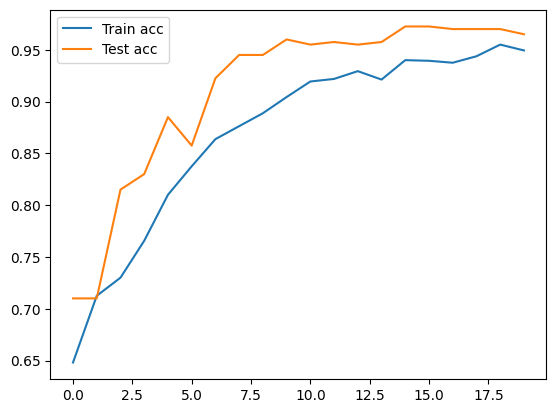

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_rnn.history['accuracy'] , label='Train acc')
plt.plot(history_rnn.history['val_accuracy'] , label='Test acc')

plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64 , input_shape=(30, 8)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

history_lstm = model_lstm.fit(X_train , y_train ,  epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6837 - loss: 0.6050 - val_accuracy: 0.7175 - val_loss: 0.4638
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7840 - loss: 0.4490 - val_accuracy: 0.9500 - val_loss: 0.2567
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9139 - loss: 0.2564 - val_accuracy: 0.9725 - val_loss: 0.1170
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9591 - loss: 0.1352 - val_accuracy: 0.9725 - val_loss: 0.0867
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9505 - loss: 0.1442 - val_accuracy: 0.9775 - val_loss: 0.0658
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9686 - loss: 0.0803 - val_accuracy: 0.9875 - val_loss: 0.0396
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9674 - loss: 0.0739 - val_accuracy: 0.9850 - val_loss: 0.0439
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9842 - loss: 0.0562 - val_accuracy: 0.9850 - val_loss: 0.

In [ ]:
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)

print("Accuracy on test data:" , accuracy_score(y_test, y_pred_lstm_binary))
print()
print("Classification Report:" , classification_report(y_test, y_pred_lstm_binary))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy on test data: 0.99

Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       284
           1       1.00      0.97      0.98       116

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(64 , input_shape=(30, 8)))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(32,activation='relu'))
model_gru.add(Dense(1,activation='sigmoid'))

model_gru.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

history_gru = model_gru.fit(X_train , y_train ,  epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6314 - loss: 0.6368 - val_accuracy: 0.7375 - val_loss: 0.4490
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7912 - loss: 0.4598 - val_accuracy: 0.8775 - val_loss: 0.3363
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8583 - loss: 0.3519 - val_accuracy: 0.9300 - val_loss: 0.2312
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9121 - loss: 0.2717 - val_accuracy: 0.9225 - val_loss: 0.2030
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9034 - loss: 0.2415 - val_accuracy: 0.9675 - val_loss: 0.1126
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9380 - loss: 0.1643 - val_accuracy: 0.9700 - val_loss: 0.0981
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9547 - loss: 0.1380 - val_accuracy: 0.9800 - val_loss: 0.0607
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9651 - loss: 0.1021 - val_accuracy: 0.9800 - val_loss: 0.

In [ ]:
y_pred_gru = model_gru.predict(X_test)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)

print("Accuracy on test data:" , accuracy_score(y_test, y_pred_gru_binary))
print()
print("Classification Report:" , classification_report(y_test, y_pred_gru_binary))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Accuracy on test data: 0.9975

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       0.99      1.00      1.00       116

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
model_gru.save("gru_critical_forecaster.h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gru_critical_forecaster.h5')
df.columns.to_list()

['patient_id',
 'day',
 'bp_systolic',
 'bp_diastolic',
 'heart_rate',
 'respiratory_rate',
 'temperature',
 'oxygen_saturation',
 'med_adherence',
 'symptom_severity',
 'progressed_to_critical',
 'readmitted']

In [ ]:
#create a synthetic data for 1 patient - (1 , 30 , 8)
new_patient_sequence = np.array([np.random.normal(loc = [120,80,75,16,98.6,97,0.8,3] ,
                                                  scale = [10,5,10,2,1,1.5,0.1,1]) for i in range(30)])

new_patient_sequence = new_patient_sequence.reshape(1,30,8)

#predict
risk_prob = model.predict(new_patient_sequence)[0][0]
print(f" Predicted risk of critical progression: {risk_prob:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
 Predicted risk of critical progression: 0.09%


In [ ]:
# Example of higher-risk synthetic patient
new_patient_sequence = np.array([np.random.normal(loc=[160, 100, 120, 25, 102, 88, 0.3, 8],
                                                  scale=[10,5,15,2,1,1,0.1,1]) for i in range(30)])
new_patient_sequence = new_patient_sequence.reshape(1,30,8)

risk_prob = model.predict(new_patient_sequence)[0][0]
print(f" Predicted risk of critical progression: {risk_prob:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
 Predicted risk of critical progression: 99.99%


In [ ]:
feature_cols = ['bp_systolic', 'bp_diastolic', 'heart_rate', 'respiratory_rate',
                 'temperature', 'oxygen_saturation', 'med_adherence', 'symptom_severity']


#get unique patients
patient_ids = df['patient_id'].unique()
print(patient_ids)

[   1    2    3 ... 1998 1999 2000]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

X = []
y = []

# Process all patient data, padding sequences to a fixed length (e.g., 30 days)
max_sequence_length = 30

for pid in patient_ids:
    patient_df = df[df['patient_id'] == pid].sort_values(by='day')

    # Pad or truncate sequences to max_sequence_length
    patient_data = patient_df[feature_cols].values
    if len(patient_data) > max_sequence_length:
        patient_data = patient_data[:max_sequence_length]
    elif len(patient_data) < max_sequence_length:
        padding_needed = max_sequence_length - len(patient_data)
        padding = np.zeros((padding_needed, len(feature_cols))) # Pad with zeros
        patient_data = np.vstack((patient_data, padding))

    X.append(patient_data)
    # Assuming readmission status is the same for all days for a given patient.
    # If not, you would need a different approach to define y.
    y.append(patient_df['readmitted'].iloc[0])


X = np.array(X)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(2000, 30, 8)
(2000,)


In [ ]:
print(y[0])

0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64 , input_shape=(30, 8)))
model_rnn.add(Dropout(0.3))
model_rnn.add(Dense(32,activation='relu'))
model_rnn.add(Dense(1,activation='sigmoid'))

model_rnn.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

history_rnn = model_rnn.fit(X_train , y_train ,  epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6473 - loss: 0.6443 - val_accuracy: 0.8000 - val_loss: 0.4611
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8145 - loss: 0.4584 - val_accuracy: 0.8000 - val_loss: 0.3987
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8096 - loss: 0.4248 - val_accuracy: 0.8150 - val_loss: 0.3587
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8198 - loss: 0.3960 - val_accuracy: 0.8300 - val_loss: 0.3092
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8304 - loss: 0.3508 - val_accuracy: 0.8625 - val_loss: 0.2538
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8328 - loss: 0.3181 - val_accuracy: 0.8875 - val_loss: 0.2124
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8791 - loss: 0.2887 - val_accuracy: 0.9025 - val_loss: 0.1992
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8789 - loss: 0.2694 - val_accuracy: 0.9300 - val_loss: 0.1977
Ep

In [ ]:
y_pred = model_rnn.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("Accuracy on test data:" , accuracy_score(y_test, y_pred_binary))
print()
print("Classification Report:" , classification_report(y_test, y_pred_binary))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy on test data: 0.95

Classification Report:               precision    recall  f1-score   support

           0       0.99      0.95      0.97       320
           1       0.83      0.95      0.88        80

    accuracy                           0.95       400
   macro avg       0.91      0.95      0.93       400
weighted avg       0.95      0.95      0.95       400



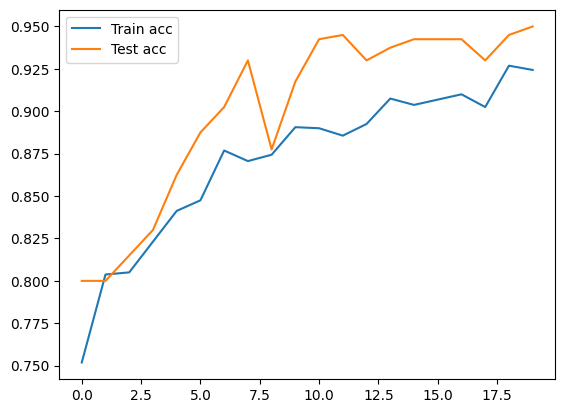

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_rnn.history['accuracy'] , label='Train acc')
plt.plot(history_rnn.history['val_accuracy'] , label='Test acc')

plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(64 , input_shape=(30, 8)))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

history_lstm = model_lstm.fit(X_train , y_train ,  epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.7853 - loss: 0.5015 - val_accuracy: 0.8000 - val_loss: 0.3876
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8073 - loss: 0.3947 - val_accuracy: 0.9000 - val_loss: 0.2978
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8542 - loss: 0.3095 - val_accuracy: 0.9025 - val_loss: 0.2302
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8670 - loss: 0.2637 - val_accuracy: 0.9175 - val_loss: 0.1909
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9009 - loss: 0.2382 - val_accuracy: 0.9300 - val_loss: 0.1840
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9196 - loss: 0.1806 - val_accuracy: 0.9350 - val_loss: 0.1493
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9065 - loss: 0.2048 - val_accuracy: 0.9375 - val_loss: 0.1449
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9268 - loss: 0.1659 - val_accuracy: 0.9400 - v

In [ ]:
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)

print("Accuracy on test data:" , accuracy_score(y_test, y_pred_lstm_binary))
print()
print("Classification Report:" , classification_report(y_test, y_pred_lstm_binary))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy on test data: 0.92

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.90      0.95       320
           1       0.71      1.00      0.83        80

    accuracy                           0.92       400
   macro avg       0.86      0.95      0.89       400
weighted avg       0.94      0.92      0.92       400



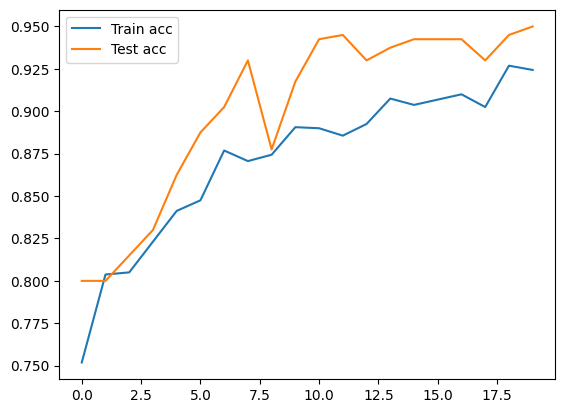

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_rnn.history['accuracy'] , label='Train acc')
plt.plot(history_rnn.history['val_accuracy'] , label='Test acc')

plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import GRU

model_gru = Sequential()
model_gru.add(GRU(64 , input_shape=(30, 8)))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(32,activation='relu'))
model_gru.add(Dense(1,activation='sigmoid'))

model_gru.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

history_gru = model_gru.fit(X_train , y_train ,  epochs=20, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7718 - loss: 0.5216 - val_accuracy: 0.8000 - val_loss: 0.4592
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8089 - loss: 0.4705 - val_accuracy: 0.8000 - val_loss: 0.3946
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8166 - loss: 0.4105 - val_accuracy: 0.8275 - val_loss: 0.3264
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8468 - loss: 0.3418 - val_accuracy: 0.9175 - val_loss: 0.2506
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8774 - loss: 0.3004 - val_accuracy: 0.9100 - val_loss: 0.2201
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8858 - loss: 0.2598 - val_accuracy: 0.9250 - val_loss: 0.1792
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9044 - loss: 0.2251 - val_accuracy: 0.9150 - val_loss: 0.1724
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9096 - loss: 0.2212 - val_accuracy: 0.8775 - v

In [ ]:
y_pred_gru = model_gru.predict(X_test)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)

print("Accuracy on test data:" , accuracy_score(y_test, y_pred_gru_binary))
print()
print("Classification Report:" , classification_report(y_test, y_pred_gru_binary))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Accuracy on test data: 0.9625

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.98       320
           1       0.90      0.91      0.91        80

    accuracy                           0.96       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.96      0.96      0.96       400



In [ ]:
# Compare the performance of the models
print("RNN Model Performance:")
y_pred_rnn = model_rnn.predict(X_test)
y_pred_rnn_binary = (y_pred_rnn > 0.5).astype(int)
print("Accuracy on test data:" , accuracy_score(y_test, y_pred_rnn_binary))
print("Classification Report:" , classification_report(y_test, y_pred_rnn_binary))
print("-" * 30)

print("LSTM Model Performance:")
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm_binary = (y_pred_lstm > 0.5).astype(int)
print("Accuracy on test data:" , accuracy_score(y_test, y_pred_lstm_binary))
print("Classification Report:" , classification_report(y_test, y_pred_lstm_binary))
print("-" * 30)

print("GRU Model Performance:")
y_pred_gru = model_gru.predict(X_test)
y_pred_gru_binary = (y_pred_gru > 0.5).astype(int)
print("Accuracy on test data:" , accuracy_score(y_test, y_pred_gru_binary))
print("Classification Report:" , classification_report(y_test, y_pred_gru_binary))

RNN Model Performance:
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Accuracy on test data: 0.95
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.95      0.97       320
           1       0.83      0.95      0.88        80

    accuracy                           0.95       400
   macro avg       0.91      0.95      0.93       400
weighted avg       0.95      0.95      0.95       400

------------------------------
LSTM Model Performance:
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy on test data: 0.92
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.90      0.95       320
           1       0.71      1.00      0.83        80

    accuracy                           0.92       400
   macro avg       0.86      0.95      0.89       400
weighted avg       0.94      0.92      0.92       400

------------------------------
GRU Model Performance:
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8m

In [ ]:
# Determine the best model based on accuracy
rnn_accuracy = accuracy_score(y_test, y_pred_rnn_binary)
lstm_accuracy = accuracy_score(y_test, y_pred_lstm_binary)
gru_accuracy = accuracy_score(y_test, y_pred_gru_binary)

best_model = None
best_model_name = ""
best_accuracy = 0

if rnn_accuracy > best_accuracy:
    best_accuracy = rnn_accuracy
    best_model = model_rnn
    best_model_name = "RNN"

if lstm_accuracy > best_accuracy:
    best_accuracy = lstm_accuracy
    best_model = model_lstm
    best_model_name = "LSTM"

if gru_accuracy > best_accuracy:
    best_accuracy = gru_accuracy
    best_model = model_gru
    best_model_name = "GRU"

print(f"The best performing model is the {best_model_name} model with an accuracy of {best_accuracy:.4f}")

The best performing model is the GRU model with an accuracy of 0.9625


In [ ]:
model_gru.save("gru_readmission.h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/gru_readmission.h5')
df.columns.to_list()

['patient_id',
 'day',
 'bp_systolic',
 'bp_diastolic',
 'heart_rate',
 'respiratory_rate',
 'temperature',
 'oxygen_saturation',
 'med_adherence',
 'symptom_severity',
 'progressed_to_critical',
 'readmitted']

In [ ]:
#create a synthetic data for 1 patient - (1 , 30 , 8)
new_patient_sequence = np.array([np.random.normal(loc = [120,80,75,16,98.6,97,0.8,3] ,
                                                  scale = [10,5,10,2,1,1.5,0.1,1]) for i in range(30)])

new_patient_sequence = new_patient_sequence.reshape(1,30,8)

#predict
risk_prob = model.predict(new_patient_sequence)[0][0]
print(f" Predicted risk of readmission: {risk_prob:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
 Predicted risk of readmission: 0.15%


In [ ]:
# Example of higher-risk synthetic patient
new_patient_sequence = np.array([np.random.normal(loc=[160, 100, 120, 25, 102, 88, 0.3, 8],
                                                  scale=[10,5,15,2,1,1,0.1,1]) for i in range(30)])
new_patient_sequence = new_patient_sequence.reshape(1,30,8)

risk_prob = model.predict(new_patient_sequence)[0][0]
print(f" Predicted risk of readmission: {risk_prob:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
 Predicted risk of readmission: 96.04%
